---

## Cell 0: Setup Virtual Environment (Local Environment Only)

### What
We're creating a dedicated virtual environment for this project to isolate dependencies and ensure reproducibility.

### Why
Using a virtual environment is a best practice because:
- Isolates project dependencies from system Python
- Prevents version conflicts with other projects
- Makes the project portable and reproducible
- Allows specific package versions without affecting other projects

### Technical Details
**For Local Development**:
1. Create a virtual environment using Python 3.9+
2. Activate the virtual environment
3. Install PyCaret with specific compatible versions

**For Google Colab**: Skip this cell (Colab manages its own environment)

### Instructions

**Option 1: Using venv (recommended)**
```bash
# Navigate to your project directory
cd /Users/banbalagan/Projects/pycaret-automl-examples

# Create virtual environment
python3.9 -m venv venv

# Activate virtual environment
# On macOS/Linux:
source venv/bin/activate
# On Windows:
# venv\Scripts\activate

# Verify Python version
python --version

# Continue to next cell for package installation
```

**Option 2: Using conda**
```bash
# Create conda environment
conda create -n pycaret-env python=3.9 -y

# Activate environment
conda activate pycaret-env
```

### Expected Output
After activation, your terminal prompt should show `(venv)` or `(pycaret-env)` prefix, indicating the virtual environment is active.

### Important Notes
- Run this in your terminal BEFORE opening Jupyter Notebook
- After creating/activating the virtual environment, install Jupyter in it:
  ```bash
  pip install jupyter notebook
  ```
- Then launch Jupyter from within the activated environment:
  ```bash
  jupyter notebook
  ```
- Select the kernel that corresponds to your virtual environment in Jupyter

---

## Cell 1: Install and Import Required Libraries

### What
We're installing PyCaret with compatible dependencies and importing all necessary Python libraries for our analysis.

### Why
Google Colab comes with pre-installed packages that can conflict with PyCaret's dependencies. For local environments, we install specific package versions to ensure stability and reproducibility.

### Technical Details
- **Google Colab**: Install compatible versions to avoid runtime crashes
- **Local Environment**: Install PyCaret with specific versions (Option 2 - recommended)
- Import all necessary libraries for data analysis and machine learning

### Expected Output
- **Google Colab**: Installation messages and a reminder to restart the runtime
- **Local Environment**: Clean installation of all required packages

### IMPORTANT (Google Colab Users)
⚠️ After running this cell in Colab, you MUST restart the runtime:
- Click: **Runtime → Restart runtime** (or Ctrl+M .)
- After restart, skip this cell and run all other cells normally

In [ ]:
# ============================================================
# INSTALLATION CELL - Environment Detection & Package Setup
# ============================================================

import sys
import os

# Check if running in Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("=" * 60)
    print("🔧 Google Colab Detected")
    print("=" * 60)
    print("📦 Installing PyCaret with compatible dependencies...")
    print("⏳ This will take 2-3 minutes, please be patient...")

    # Upgrade pip first
    !pip install -q --upgrade pip

    # Install compatible base packages FIRST (prevents conflicts)
    print("Step 1/3: Installing base packages with compatible versions...")
    !pip install -q --upgrade \
        numpy>=1.23.0,<2.0.0 \
        pandas>=2.0.0,<2.3.0 \
        scipy>=1.10.0,<1.14.0 \
        scikit-learn>=1.3.0,<1.6.0 \
        matplotlib>=3.7.0,<3.9.0

    # Install PyCaret (will use already installed base packages)
    print("Step 2/3: Installing PyCaret...")
    !pip install -q pycaret

    # Install additional ML packages
    print("Step 3/3: Installing additional ML packages...")
    !pip install -q \
        category-encoders \
        lightgbm \
        xgboost \
        catboost \
        optuna \
        plotly \
        kaleido

    print("\n" + "=" * 60)
    print("✅ Installation Complete!")
    print("=" * 60)
    print("⚠️  CRITICAL: You MUST restart the runtime now!")
    print("   👉 Click: Runtime → Restart runtime (or Ctrl+M .)")
    print("🔄 After restart:")
    print("   1. Skip this installation cell")
    print("   2. Run all other cells normally")
    print("   3. Everything will work without crashes!")
    print("=" * 60)

else:
    print("=" * 60)
    print("📍 Local Environment Detected")
    print("=" * 60)
    print("Installing PyCaret with specific compatible versions...")
    print("Using Option 2: Controlled dependency installation\n")
    
    # Upgrade pip first
    !pip install -q --upgrade pip
    
    # Install base packages with specific versions (Option 2)
    print("Step 1/4: Installing base packages...")
    !pip install -q \
        numpy>=1.23.0,<2.0.0 \
        pandas>=2.0.0,<2.3.0 \
        scipy>=1.10.0,<1.14.0 \
        scikit-learn>=1.3.0,<1.6.0 \
        matplotlib>=3.7.0,<3.9.0 \
        seaborn>=0.12.0
    
    # Install PyCaret
    print("Step 2/4: Installing PyCaret...")
    !pip install -q pycaret
    
    # Install additional ML packages
    print("Step 3/4: Installing additional ML libraries...")
    !pip install -q \
        category-encoders \
        lightgbm \
        xgboost \
        catboost \
        optuna \
        plotly \
        kaleido
    
    # Install notebook support packages
    print("Step 4/4: Installing notebook support packages...")
    !pip install -q ipywidgets
    
    print("\n" + "=" * 60)
    print("✅ Installation Complete!")
    print("=" * 60)
    print("All packages installed successfully in your virtual environment.")
    print("You can now proceed with running the rest of the notebook.")
    print("=" * 60)

# Import libraries after installation
print("\n📚 Importing libraries...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("\n✓ Libraries imported successfully!")
print(f"   - Python version: {sys.version.split()[0]}")
print(f"   - Pandas version: {pd.__version__}")
print(f"   - NumPy version: {np.__version__}")
print(f"   - Working directory: {os.getcwd()}")

# Check if running in virtual environment
if hasattr(sys, 'real_prefix') or (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix):
    print(f"   - Virtual environment: Active ✓")
    print(f"   - Environment path: {sys.prefix}")
else:
    print("   - Virtual environment: Not detected (consider using venv)")
    
print("\n" + "=" * 60)

---

## Cell 2: Load the Heart Disease Dataset

### What
We're loading the heart disease dataset from a CSV file into a pandas DataFrame.

### Why
The dataset needs to be loaded into memory before we can perform any analysis or machine learning operations on it.

### Technical Details
- **Local Environment**: Loads from the project's datasets folder
- **Google Colab**: Loads from a public URL
- The dataset contains 1,025 rows and 14 columns (13 features + 1 target variable)

### Dataset Locations
- **Local Path**: `/Users/banbalagan/Projects/pycaret-automl-examples/datasets/binary-classification/heart.csv`
- **Remote URL**: For Colab users or if local file is not available

### Expected Output
Success message confirming dataset loaded, along with the shape (number of rows and columns).

In [3]:
import sys
import os
import pandas as pd
# Check if running in Colab
IN_COLAB = 'google.colab' in sys.modules

# Define dataset paths
LOCAL_PATH = '/Users/banbalagan/Projects/pycaret-automl-examples/datasets/binary-classification/heart.csv'
#REMOTE_URL = 'https://raw.githubusercontent.com/rashida048/Datasets/master/heart.csv'

# Try to load from local path first (for local development)
if not IN_COLAB and os.path.exists(LOCAL_PATH):
    print("=" * 60)
    print("📂 Loading dataset from local path...")
    print("=" * 60)
    print(f"Path: {LOCAL_PATH}\n")
    df = pd.read_csv(LOCAL_PATH)
    print(f"✓ Dataset loaded successfully from local file!")
    
elif not IN_COLAB:
    # Local environment but file doesn't exist - check relative path
    print("=" * 60)
    print("⚠️  Local path not found, trying relative path...")
    print("=" * 60)
    
    # Try relative path from notebook location
    relative_paths = [
        '../../datasets/binary-classification/heart.csv',
        '../datasets/binary-classification/heart.csv',
        'heart.csv'
    ]
    
    dataset_loaded = False
    for rel_path in relative_paths:
        if os.path.exists(rel_path):
            print(f"✓ Found dataset at: {rel_path}\n")
            df = pd.read_csv(rel_path)
            dataset_loaded = True
            print(f"✓ Dataset loaded successfully from relative path!")
            break
    
    if not dataset_loaded:
        print("⚠️  Could not find local dataset file.")
        print(f"Expected location: {LOCAL_PATH}")
        print("\nFalling back to remote URL...\n")
        df = pd.read_csv(REMOTE_URL)
        print(f"✓ Dataset loaded successfully from remote URL!")
        
else:
    # Google Colab - always use remote URL
    print("=" * 60)
    print("☁️  Loading dataset from remote URL (Google Colab)...")
    print("=" * 60)
    print(f"URL: {REMOTE_URL}\n")
    df = pd.read_csv(REMOTE_URL)
    print(f"✓ Dataset loaded successfully from remote URL!")

# Display basic information
print("\n" + "=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n" + "=" * 60)
print("COLUMN NAMES")
print("=" * 60)
print(f"Features: {list(df.columns[:-1])}")
print(f"Target: {df.columns[-1]}")

print("\n" + "=" * 60)
print("FIRST 5 ROWS")
print("=" * 60)
df.head()

📂 Loading dataset from local path...
Path: /Users/banbalagan/Projects/pycaret-automl-examples/datasets/binary-classification/heart.csv

✓ Dataset loaded successfully from local file!

DATASET INFORMATION
Shape: 303 rows, 14 columns
Memory usage: 33.27 KB

COLUMN NAMES
Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Target: target

FIRST 5 ROWS


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


---

## Cell 3: Initial Data Exploration

### What
We're examining the structure, data types, and basic statistics of our dataset.

### Why
Understanding the data is crucial before building models. We need to:
- Check data types (numerical vs categorical)
- Identify missing values
- Understand the distribution of features
- Detect potential outliers

### Technical Details
- `df.info()`: Shows data types, non-null counts, memory usage
- `df.describe()`: Statistical summary of numerical columns (mean, std, min, max, quartiles)
- `df.isnull().sum()`: Counts missing values per column

### Expected Output
- Data types for each column
- Summary statistics (means, standard deviations, etc.)
- Missing value counts (should be 0 for this clean dataset)

In [4]:
# Display data types and info
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print("STATISTICAL SUMMARY")
print("=" * 50)
display(df.describe())

print("\n" + "=" * 50)
print("MISSING VALUES CHECK")
print("=" * 50)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

STATISTICAL SUMMARY


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



MISSING VALUES CHECK
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Total missing values: 0


---

## Cell 4: Target Variable Distribution

### What
We're analyzing the distribution of our target variable (presence or absence of heart disease) using both numerical counts and visualizations.

### Why
Understanding the target variable distribution is critical because:
- It tells us if we have a **class imbalance** problem
- Helps us choose appropriate evaluation metrics
- Informs us whether we need to use techniques like SMOTE or class weighting

### Technical Details
- `value_counts()`: Counts occurrences of each class
- `normalize=True`: Shows proportions instead of counts
- `sns.countplot()`: Creates a bar chart showing class distribution

### Expected Output
- Count and percentage of patients with/without heart disease
- Bar chart visualization showing the class distribution
- Ideally, we want classes to be relatively balanced (close to 50-50)

TARGET VARIABLE DISTRIBUTION

Value Counts:
target
1    165
0    138
Name: count, dtype: int64

Percentage Distribution:
target
1    54.455446
0    45.544554
Name: proportion, dtype: float64


/var/folders/t4/hgk2j04x6fscyh31ps8psdjc0000gn/T/ipykernel_2758/3011412988.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2', ax=ax1)


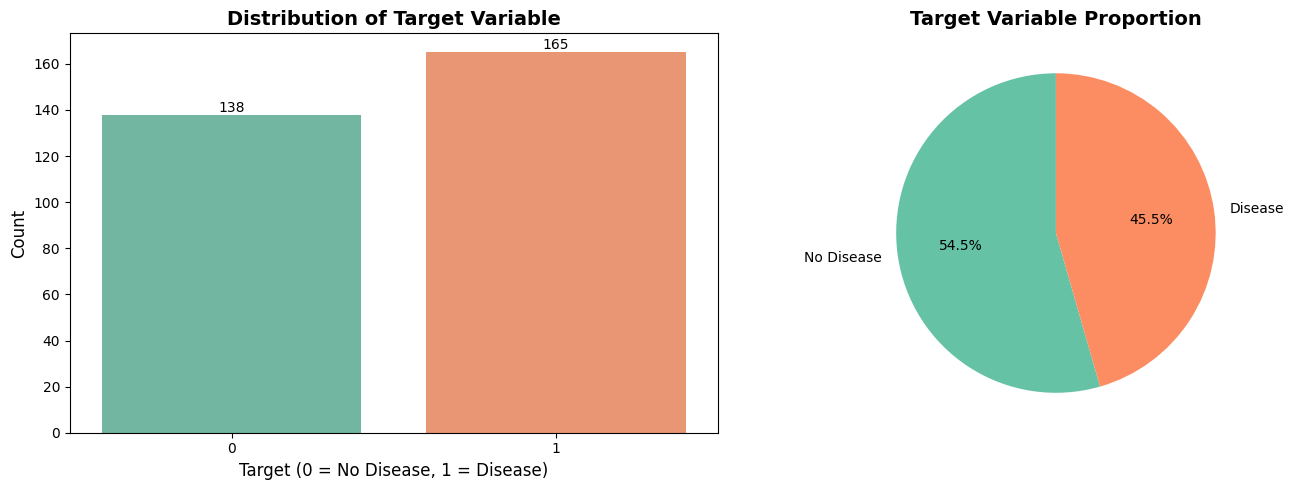


Class Balance Ratio: 0.84
✓ Dataset is well-balanced


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 50)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 50)

# Count of each class
print("\nValue Counts:")
print(df['target'].value_counts())

print("\nPercentage Distribution:")
print(df['target'].value_counts(normalize=True) * 100)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='target', palette='Set2', ax=ax1)
ax1.set_title('Distribution of Target Variable', fontsize=14, fontweight='bold')
ax1.set_xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Add count labels on bars
for container in ax1.containers:
    ax1.bar_label(container)

# Pie chart
target_counts = df['target'].value_counts()
ax2.pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', 
        colors=['#66c2a5', '#fc8d62'], startangle=90)
ax2.set_title('Target Variable Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate class balance ratio
balance_ratio = target_counts.min() / target_counts.max()
print(f"\nClass Balance Ratio: {balance_ratio:.2f}")
if balance_ratio >= 0.8:
    print("✓ Dataset is well-balanced")
elif balance_ratio >= 0.5:
    print("⚠ Dataset has moderate imbalance")
else:
    print("✗ Dataset has significant class imbalance")

---

## Cell 5: Exploratory Data Analysis - Feature Distributions

### What
We're visualizing the distribution of numerical features to understand their patterns and potential relationships with the target variable.

### Why
Exploring feature distributions helps us:
- Identify skewed distributions that might need transformation
- Spot outliers that could affect model performance
- Understand value ranges for different features
- See if features discriminate well between classes

### Technical Details
- We'll create histograms for continuous features
- Use different colors for different target classes
- This helps visualize which features might be good predictors

### Expected Output
- Multiple subplots showing distributions of key features
- Different colors representing patients with/without heart disease
- Features with clear separation are likely to be good predictors

FEATURE DISTRIBUTIONS BY TARGET


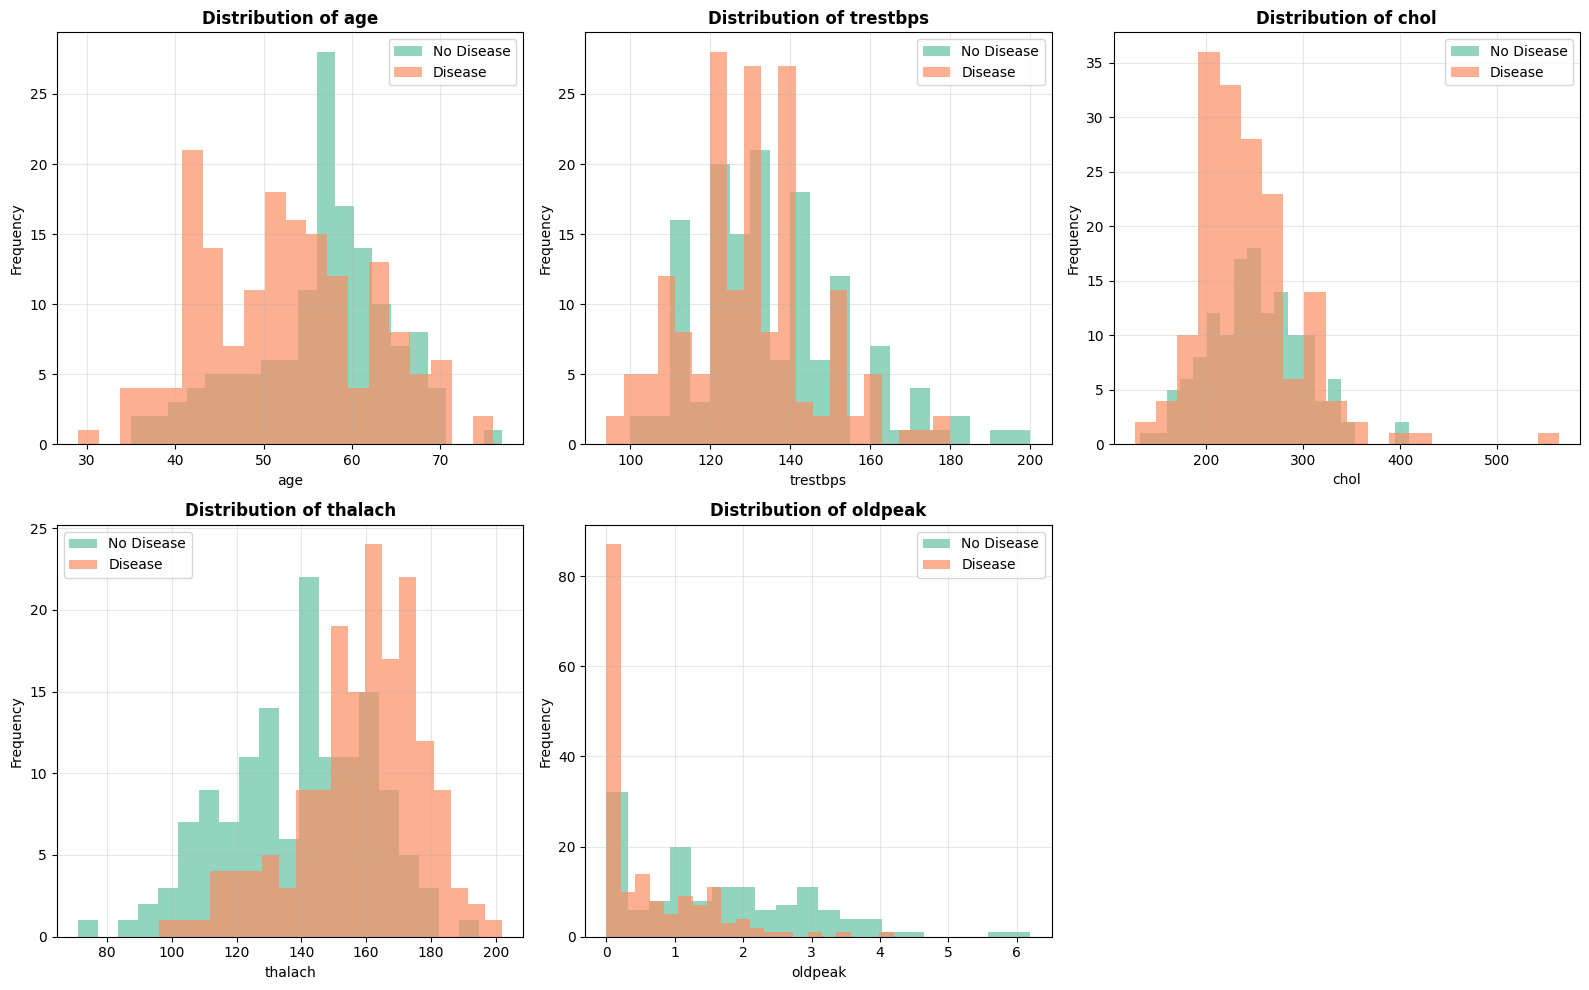


Key Observations:
- Look for features where the distributions differ significantly between classes
- These features will likely be important predictors in our model


In [7]:
print("=" * 50)
print("FEATURE DISTRIBUTIONS BY TARGET")
print("=" * 50)

# Select numerical features for visualization
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    # Create histogram with different colors for each target class
    df[df['target'] == 0][feature].hist(ax=axes[idx], alpha=0.7, label='No Disease', 
                                         color='#66c2a5', bins=20)
    df[df['target'] == 1][feature].hist(ax=axes[idx], alpha=0.7, label='Disease', 
                                         color='#fc8d62', bins=20)
    
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("- Look for features where the distributions differ significantly between classes")
print("- These features will likely be important predictors in our model")

---

## Cell 6: Correlation Analysis

### What
We're creating a correlation matrix heatmap to understand relationships between different features and the target variable.

### Why
Correlation analysis helps us:
- Identify features strongly correlated with the target (good predictors)
- Detect multicollinearity (high correlation between features)
- Understand feature interactions
- Potentially eliminate redundant features

### Technical Details
- `df.corr()`: Calculates Pearson correlation coefficients (-1 to +1)
- `sns.heatmap()`: Visualizes the correlation matrix
- **Positive correlation**: Variables move together (closer to +1)
- **Negative correlation**: Variables move in opposite directions (closer to -1)
- **No correlation**: Close to 0

### Expected Output
- Heatmap showing correlations between all features
- List of features most correlated with the target variable
- Strong correlations (>0.7 or <-0.7) highlighted

CORRELATION ANALYSIS


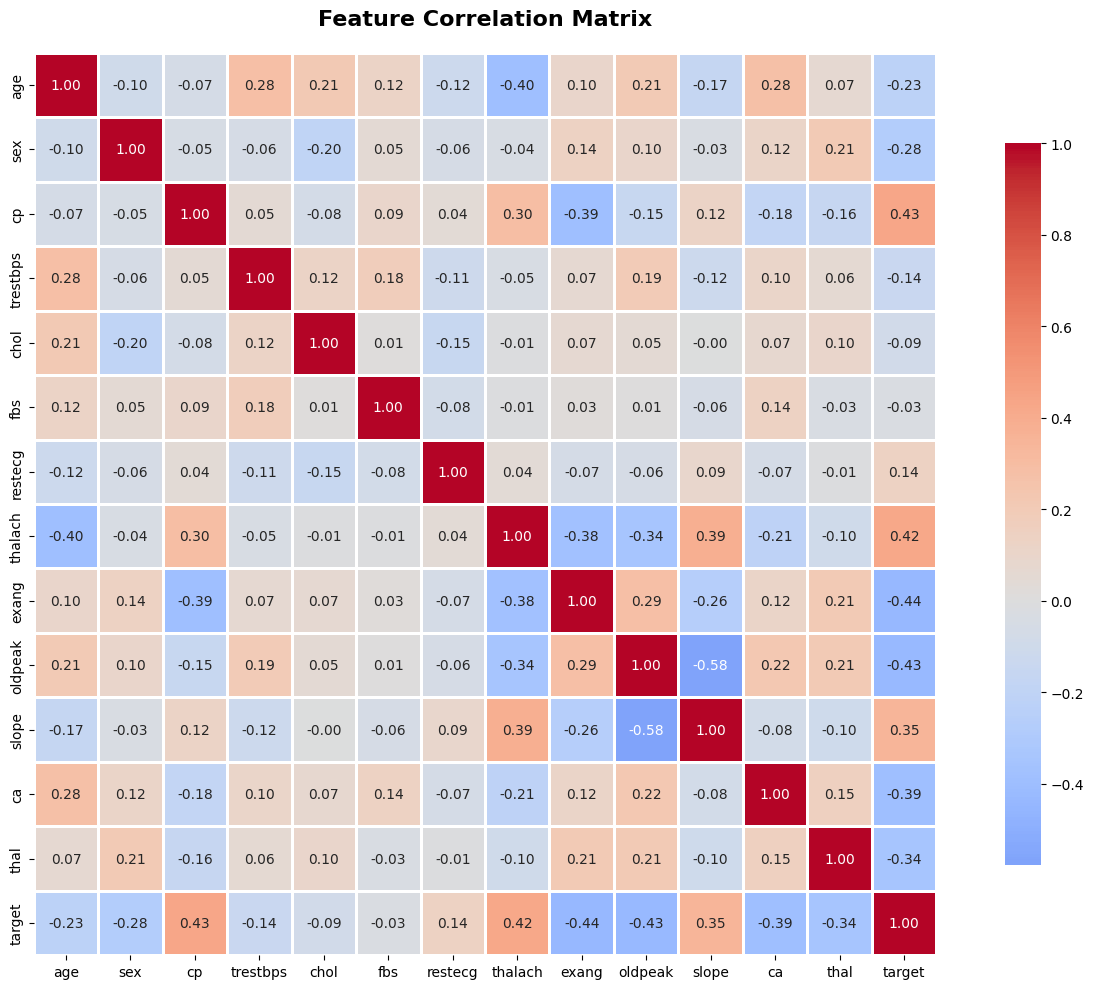


Features Most Correlated with Target:
target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

TOP POSITIVE CORRELATIONS WITH TARGET
cp          : +0.434
thalach     : +0.422
slope       : +0.346
restecg     : +0.137

TOP NEGATIVE CORRELATIONS WITH TARGET
fbs         : -0.028
chol        : -0.085
trestbps    : -0.145
age         : -0.225
sex         : -0.281
thal        : -0.344
ca          : -0.392
oldpeak     : -0.431
exang       : -0.437


In [8]:
print("=" * 50)
print("CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Features most correlated with target
print("\nFeatures Most Correlated with Target:")
print("=" * 50)
target_corr = corr_matrix['target'].sort_values(ascending=False)
print(target_corr)

print("\n" + "=" * 50)
print("TOP POSITIVE CORRELATIONS WITH TARGET")
print("=" * 50)
positive_corr = target_corr[target_corr > 0].drop('target')
for feature, corr in positive_corr.items():
    print(f"{feature:12s}: {corr:+.3f}")

print("\n" + "=" * 50)
print("TOP NEGATIVE CORRELATIONS WITH TARGET")
print("=" * 50)
negative_corr = target_corr[target_corr < 0]
for feature, corr in negative_corr.items():
    print(f"{feature:12s}: {corr:+.3f}")

---

## Cell 7: PyCaret Setup - Initialize Classification Environment

### What
We're initializing PyCaret's classification environment with our dataset and configuration parameters.

### Why
The `setup()` function is the foundation of PyCaret's AutoML workflow. It:
- Infers data types automatically
- Handles missing values
- Performs feature engineering
- Splits data into train and test sets
- Prepares the data preprocessing pipeline

### Technical Details
**Key Parameters**:
- `data`: Our DataFrame
- `target`: The column we want to predict ('target')
- `session_id`: For reproducibility (same results every time)
- `train_size`: Proportion of data for training (0.8 = 80% train, 20% test)
- `normalize`: Scale numerical features to similar ranges
- `transformation`: Apply mathematical transformations to improve normality
- `fix_imbalance`: Use SMOTE to balance classes if needed
- `fold`: Number of cross-validation folds (10-fold CV)

### Expected Output
- Summary table showing data types, transformations applied
- Train/test split information
- Preprocessing steps that will be applied
- Confirmation that setup is complete

In [9]:
# Import PyCaret classification module
from pycaret.classification import *

print("=" * 50)
print("PYCARET SETUP - CLASSIFICATION")
print("=" * 50)

# Initialize PyCaret setup (PyCaret 3.x uses 'session_id' instead of 'session_seed')
clf_setup = setup(
    data=df,
    target='target',
    session_id=42,  # Changed from session_seed to session_id for PyCaret 3.x
    train_size=0.8,
    normalize=True,
    transformation=True,
    fold=10,
    verbose=True
)

print("\n✓ PyCaret setup completed successfully!")
print("\nData preprocessing pipeline has been created.")
print("Ready for model training and comparison.")

PYCARET SETUP - CLASSIFICATION


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(242, 14)"
6,Transformed test set shape,"(61, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple



✓ PyCaret setup completed successfully!

Data preprocessing pipeline has been created.
Ready for model training and comparison.


---

## Cell 8: Compare Multiple Models - AutoML Magic!

### What
We're using PyCaret's `compare_models()` function to automatically train and evaluate multiple classification algorithms.

### Why
This is the core of AutoML! Instead of manually training each algorithm one by one, PyCaret:
- Trains 15-20 different algorithms automatically
- Uses 10-fold cross-validation for each
- Evaluates them on multiple metrics (Accuracy, AUC, Recall, Precision, F1)
- Ranks them by performance
- Shows us the best models in seconds/minutes

### Technical Details
**Algorithms Compared**:
- Logistic Regression
- K-Nearest Neighbors
- Naive Bayes
- Decision Tree
- Random Forest
- Extra Trees
- Gradient Boosting (GBM, XGBoost, LightGBM, CatBoost)
- Support Vector Machine
- AdaBoost
- And more!

**Parameters**:
- `sort`: Metric to rank models by (default: 'Accuracy')
- `n_select`: Number of top models to return (we'll get top 5)
- `fold`: Cross-validation folds (already set in setup)

### Expected Output
- Table showing all models ranked by performance
- Metrics: Accuracy, AUC, Recall, Precision, F1, Kappa, MCC
- Training time for each model
- Top 5 models will be stored for further analysis

In [10]:
print("=" * 50)
print("COMPARING MULTIPLE MODELS (OPTIMIZED FOR SPEED)")
print("=" * 50)
print("\nTraining 5 fast, accurate models...")
print("Estimated time: 1-2 minutes on M4.\n")

# Compare only fast models - reduced from 15+ models
top_models = compare_models(
    include=['lr', 'dt', 'rf', 'lightgbm', 'nb'],  # 5 fast models
    n_select=5,  # Keep all 5 for ensemble later
    sort='AUC',
    fold=5,  # Reduced from 10 folds to 5 for speed
    verbose=False  # Less verbose output
)

print("\n" + "=" * 50)
print("MODEL COMPARISON COMPLETE!")
print("=" * 50)
print("\nTop 5 models have been identified and stored.")
print("\nKey Metrics Explained:")
print("- Accuracy: Overall correctness of predictions")
print("- AUC: Area Under ROC Curve (ability to discriminate between classes)")
print("- Recall: Ability to find all positive cases (sensitivity)")
print("- Precision: Accuracy of positive predictions")
print("- F1: Harmonic mean of Precision and Recall")

COMPARING MULTIPLE MODELS (OPTIMIZED FOR SPEED)

Training 5 fast, accurate models...
Estimated time: 1-2 minutes on M4.


MODEL COMPARISON COMPLETE!

Top 5 models have been identified and stored.

Key Metrics Explained:
- Accuracy: Overall correctness of predictions
- AUC: Area Under ROC Curve (ability to discriminate between classes)
- Recall: Ability to find all positive cases (sensitivity)
- Precision: Accuracy of positive predictions
- F1: Harmonic mean of Precision and Recall


---

## Cell 9: Select and Analyze the Best Model

### What
We're selecting the top-performing model from our comparison and examining its detailed performance.

### Why
After comparing many models, we need to:
- Select the best one for further optimization
- Understand its strengths and weaknesses
- Examine detailed metrics beyond just accuracy

### Technical Details
- `top_models[0]`: First model in our list of top 5 (best performer)
- We'll print the model details and architecture
- This model will be used for tuning and ensemble creation

### Expected Output
- Model name and algorithm type
- Model parameters and configuration
- This is our baseline model before optimization

In [11]:
print("=" * 50)
print("BEST MODEL ANALYSIS")
print("=" * 50)

# Select the best model (first in the list)
best_model = top_models[0]

print(f"\nBest Model: {type(best_model).__name__}")
print("\nModel Details:")
print(best_model)

print("\n" + "=" * 50)
print("This model will be used for:")
print("  1. Hyperparameter tuning")
print("  2. Creating ensemble models")
print("  3. Final predictions")
print("=" * 50)

BEST MODEL ANALYSIS

Best Model: LogisticRegression

Model Details:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

This model will be used for:
  1. Hyperparameter tuning
  2. Creating ensemble models
  3. Final predictions


---

## Cell 10: Hyperparameter Tuning - Optimize the Best Model

### What
We're using PyCaret's `tune_model()` to automatically find the optimal hyperparameters for our best model.

### Why
Every ML algorithm has **hyperparameters** (settings that control how the algorithm learns). For example:
- Random Forest: number of trees, max depth, min samples
- Gradient Boosting: learning rate, number of estimators
- SVM: kernel type, C parameter, gamma

Finding the right combination can significantly improve performance!

### Technical Details
**How it works**:
- PyCaret uses **RandomizedSearchCV** or **GridSearchCV**
- Tests different combinations of hyperparameters
- Uses cross-validation to evaluate each combination
- Selects the combination with best performance

**Parameters**:
- `estimator`: The model to tune (our best model)
- `optimize`: Metric to optimize (AUC is good for classification)
- `n_iter`: Number of parameter combinations to try (50 is a good balance)

### Expected Output
- Improved performance metrics compared to the base model
- The tuned model with optimal hyperparameters
- Typically see 1-5% improvement in accuracy

In [12]:
print("=" * 50)
print("HYPERPARAMETER TUNING")
print("=" * 50)
print("\nSearching for optimal hyperparameters...")
print("Estimated time: 1-2 minutes.\n")

# Tune the best model (reduced iterations for speed)
tuned_model = tune_model(
    estimator=best_model,
    optimize='AUC',
    n_iter=30  # Reduced from 50 to 30 for faster tuning
)

print("\n" + "=" * 50)
print("TUNING COMPLETE!")
print("=" * 50)
print("\nOptimal hyperparameters have been found.")
print("\nTuned Model Details:")
print(tuned_model)

HYPERPARAMETER TUNING

Searching for optimal hyperparameters...
Estimated time: 1-2 minutes.



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8766,0.8571,0.8000,0.8276,0.5902,0.5922
1,0.7200,0.8052,0.7857,0.7333,0.7586,0.4262,0.4277
2,0.7500,0.8392,0.8462,0.7333,0.7857,0.4894,0.4966
3,0.8750,0.9371,0.9231,0.8571,0.8889,0.7465,0.7492
4,0.8750,0.9580,0.8462,0.9167,0.8800,0.7500,0.7526
5,0.8333,0.9091,0.9231,0.8000,0.8571,0.6596,0.6693
6,0.8750,0.9720,0.9231,0.8571,0.8889,0.7465,0.7492
7,0.9167,0.9580,0.8462,1.0000,0.9167,0.8345,0.8462
8,0.8750,0.9580,0.8462,0.9167,0.8800,0.7500,0.7526


Fitting 10 folds for each of 30 candidates, totalling 300 fits

TUNING COMPLETE!

Optimal hyperparameters have been found.

Tuned Model Details:
LogisticRegression(C=5.643000000000001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


---

## Cell 11: Model Evaluation Plots

### What
We're creating comprehensive visualizations to evaluate our tuned model's performance from different angles.

### Why
Different plots reveal different aspects of model performance:
- **AUC-ROC Curve**: Trade-off between true positive rate and false positive rate
- **Confusion Matrix**: Actual vs predicted classifications
- **Feature Importance**: Which features contribute most to predictions
- **Precision-Recall Curve**: Trade-off between precision and recall
- **Learning Curve**: Model performance vs training set size

### Technical Details
PyCaret's `plot_model()` function supports 20+ plot types:
- `'auc'`: ROC-AUC curve
- `'confusion_matrix'`: Confusion matrix
- `'feature'`: Feature importance
- `'pr'`: Precision-Recall curve
- `'learning'`: Learning curve
- `'calibration'`: Calibration plot
- And many more!

### Expected Output
- Multiple plots showing model performance from different perspectives
- Visual insights into model strengths and weaknesses

MODEL EVALUATION VISUALIZATIONS

1. AUC-ROC Curve
   Shows trade-off between True Positive Rate and False Positive Rate


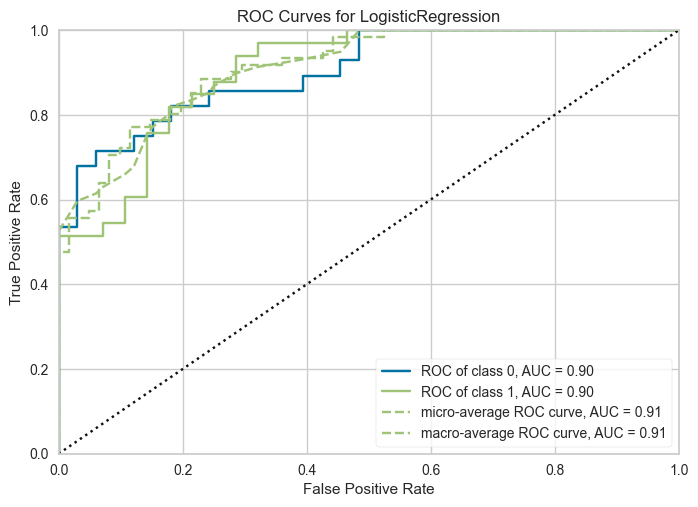


2. Confusion Matrix
   Shows correct and incorrect predictions


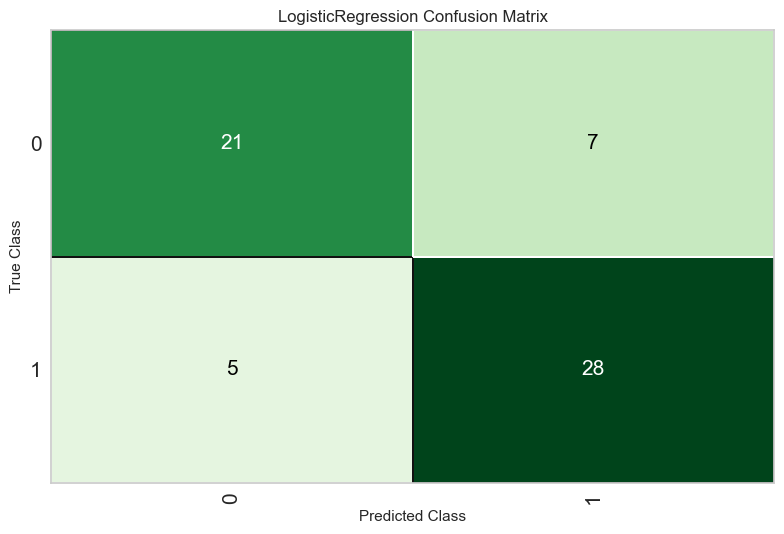


3. Feature Importance
   Shows which features contribute most to predictions


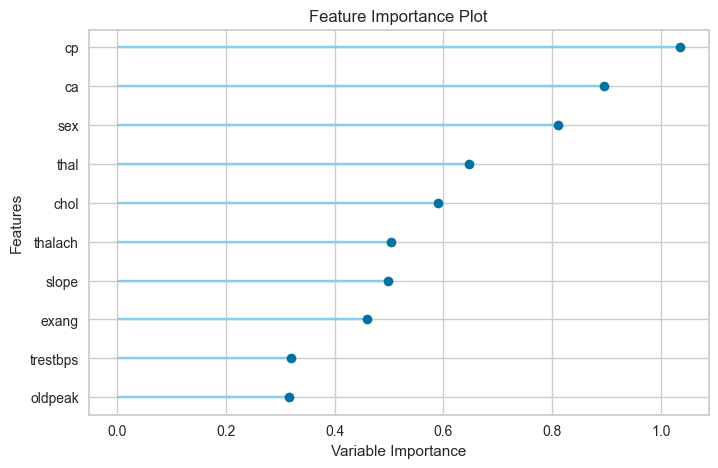


4. Precision-Recall Curve
   Shows trade-off between Precision and Recall


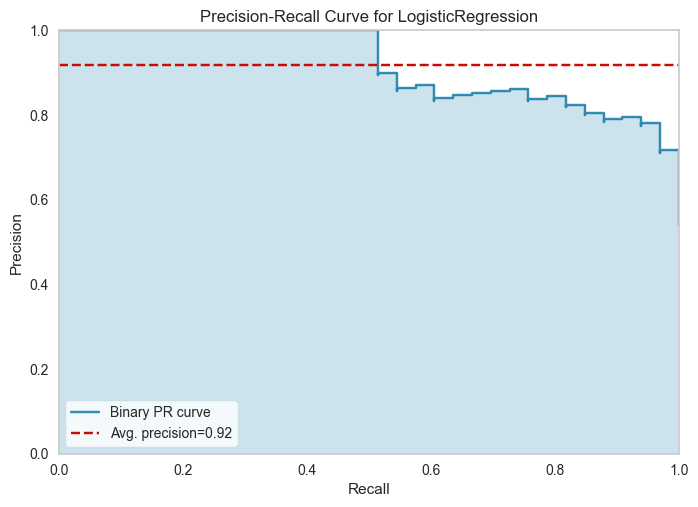


All evaluation plots generated successfully!


In [13]:
print("=" * 50)
print("MODEL EVALUATION VISUALIZATIONS")
print("=" * 50)

# AUC-ROC Curve
print("\n1. AUC-ROC Curve")
print("   Shows trade-off between True Positive Rate and False Positive Rate")
plot_model(tuned_model, plot='auc')

# Confusion Matrix
print("\n2. Confusion Matrix")
print("   Shows correct and incorrect predictions")
plot_model(tuned_model, plot='confusion_matrix')

# Feature Importance
print("\n3. Feature Importance")
print("   Shows which features contribute most to predictions")
plot_model(tuned_model, plot='feature')

# Precision-Recall Curve
print("\n4. Precision-Recall Curve")
print("   Shows trade-off between Precision and Recall")
plot_model(tuned_model, plot='pr')

print("\n" + "=" * 50)
print("All evaluation plots generated successfully!")
print("=" * 50)

---

## Cell 12: Create Blended Model (Ensemble Method 1)

### What
We're creating a **blended model** that combines predictions from our top 3 models using averaging.

### Why
**Ensemble learning** combines multiple models to achieve better performance than any single model. Think of it like:
- Getting a second (and third) medical opinion
- Having a committee make decisions instead of one person

**Blending** works by:
- Taking predictions from multiple models
- Averaging them (for probabilities) or voting (for classes)
- Often more robust and accurate than individual models

### Technical Details
**Parameters**:
- `estimator_list`: List of models to blend (we'll use top 3)
- `method`: How to combine predictions
  - `'soft'`: Average predicted probabilities (better for classification)
  - `'hard'`: Majority voting on predicted classes

### Expected Output
- Performance metrics for the blended model
- Usually see improvement over individual models
- More stable predictions with reduced variance

In [14]:
print("=" * 50)
print("CREATING BLENDED MODEL")
print("=" * 50)
print("\nCombining top 3 models using soft voting (averaging probabilities)...\n")

# Create blended model from top 3 models
blended_model = blend_models(
    estimator_list=top_models[:3],
    method='soft'
)

print("\n" + "=" * 50)
print("BLENDED MODEL CREATED!")
print("=" * 50)
print("\nHow blending works:")
print("1. Each of the 3 models makes a prediction")
print("2. Their probability predictions are averaged")
print("3. Final prediction is based on the average probability")
print("\nBenefit: More robust predictions, less sensitive to outliers")

CREATING BLENDED MODEL

Combining top 3 models using soft voting (averaging probabilities)...



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.8636,0.8571,0.8571,0.8571,0.6753,0.6753
1,0.7600,0.7987,0.8571,0.7500,0.8000,0.5033,0.5104
2,0.7917,0.8392,0.8462,0.7857,0.8148,0.5775,0.5795
3,0.8750,0.9510,1.0000,0.8125,0.8966,0.7429,0.7687
4,0.8750,0.9720,0.7692,1.0000,0.8696,0.7534,0.7774
5,0.7917,0.8811,0.9231,0.7500,0.8276,0.5714,0.5913
6,0.9167,0.9720,0.9231,0.9231,0.9231,0.8322,0.8322
7,0.8750,0.9580,0.8462,0.9167,0.8800,0.7500,0.7526
8,0.8750,0.9510,0.8462,0.9167,0.8800,0.7500,0.7526



BLENDED MODEL CREATED!

How blending works:
1. Each of the 3 models makes a prediction
2. Their probability predictions are averaged
3. Final prediction is based on the average probability

Benefit: More robust predictions, less sensitive to outliers


---

## Cell 13: Create Stacked Model (Ensemble Method 2)

### What
We're creating a **stacked model** that uses a meta-learner to combine predictions from multiple base models.

### Why
**Stacking** is more sophisticated than blending:
- Base models make predictions
- A **meta-model** (final estimator) learns how to best combine them
- The meta-model can learn complex patterns in how base models complement each other

**Analogy**: Instead of simple averaging (blending), stacking is like having an expert judge who knows which doctor to trust more for specific types of cases.

### Technical Details
**How Stacking Works**:
1. Train multiple base models on the training data
2. Use cross-validation to generate predictions from base models
3. Train a meta-model using base model predictions as features
4. Final predictions come from the meta-model

**Parameters**:
- `estimator_list`: Base models to stack (top 5)
- `meta_model`: Final model that combines predictions (defaults to Logistic Regression)

### Expected Output
- Performance metrics for stacked model
- Often achieves the best performance
- Takes longer to train but usually worth it!

In [15]:
print("=" * 50)
print("CREATING STACKED MODEL")
print("=" * 50)
print("\nBuilding a meta-learner to combine top 5 models...")
print("This may take a few minutes.\n")

# Create stacked model from top 5 models
stacked_model = stack_models(
    estimator_list=top_models
)

print("\n" + "=" * 50)
print("STACKED MODEL CREATED!")
print("=" * 50)
print("\nHow stacking works:")
print("1. Base models (5 models) make predictions on training data")
print("2. Meta-model learns from base model predictions")
print("3. Meta-model makes final prediction using all base predictions")
print("\nBenefit: Can achieve better performance than any individual model")

CREATING STACKED MODEL

Building a meta-learner to combine top 5 models...
This may take a few minutes.



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.8831,0.8571,0.8571,0.8571,0.6753,0.6753
1,0.7200,0.7922,0.7857,0.7333,0.7586,0.4262,0.4277
2,0.7917,0.8531,0.8462,0.7857,0.8148,0.5775,0.5795
3,0.8750,0.9510,1.0000,0.8125,0.8966,0.7429,0.7687
4,0.8333,0.9650,0.7692,0.9091,0.8333,0.6690,0.6783
5,0.7917,0.8811,0.9231,0.7500,0.8276,0.5714,0.5913
6,0.9167,0.9720,0.9231,0.9231,0.9231,0.8322,0.8322
7,0.8750,0.9580,0.8462,0.9167,0.8800,0.7500,0.7526
8,0.8750,0.9580,0.8462,0.9167,0.8800,0.7500,0.7526



STACKED MODEL CREATED!

How stacking works:
1. Base models (5 models) make predictions on training data
2. Meta-model learns from base model predictions
3. Meta-model makes final prediction using all base predictions

Benefit: Can achieve better performance than any individual model


---

## Cell 14: Model Calibration

### What
We're calibrating our tuned model to improve the reliability of its probability predictions.

### Why
Many ML models output probabilities, but these aren't always well-calibrated:
- A model might say "80% probability" but actually be right only 60% of the time
- **Calibration** adjusts probabilities to match real-world frequencies
- Critical for applications where probability matters (medical diagnosis, risk assessment)

**Example**: If the model says 100 patients have 70% chance of disease, we'd expect about 70 of them to actually have it.

### Technical Details
**Calibration Methods**:
- `'sigmoid'`: Platt scaling (assumes sigmoid-shaped calibration curve)
- `'isotonic'`: Non-parametric approach (more flexible)

The `calibrate_model()` function:
- Applies calibration to probability predictions
- Uses a held-out validation set to learn calibration mapping
- Returns a calibrated version of the model

### Expected Output
- Calibrated model with more reliable probability predictions
- Performance metrics (might be similar to uncalibrated)
- Better probability estimates even if accuracy stays the same

In [16]:
print("=" * 50)
print("MODEL CALIBRATION")
print("=" * 50)
print("\nCalibrating probability predictions for better reliability...\n")

# Calibrate the tuned model
calibrated_model = calibrate_model(tuned_model)

print("\n" + "=" * 50)
print("CALIBRATION COMPLETE!")
print("=" * 50)
print("\nWhat calibration does:")
print("- Adjusts probability outputs to match real-world frequencies")
print("- Example: If model says 70% probability, patient should have")
print("  roughly 70% actual chance of having heart disease")
print("\nImportant for: Medical diagnosis, risk assessment, decision-making")

MODEL CALIBRATION

Calibrating probability predictions for better reliability...



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.8766,0.9286,0.8125,0.8667,0.6689,0.6782
1,0.7600,0.8052,0.8571,0.7500,0.8000,0.5033,0.5104
2,0.7500,0.8322,0.8462,0.7333,0.7857,0.4894,0.4966
3,0.8750,0.9371,0.9231,0.8571,0.8889,0.7465,0.7492
4,0.8750,0.9580,0.8462,0.9167,0.8800,0.7500,0.7526
5,0.7917,0.9091,0.9231,0.7500,0.8276,0.5714,0.5913
6,0.8750,0.9720,0.9231,0.8571,0.8889,0.7465,0.7492
7,0.8750,0.9580,0.8462,0.9167,0.8800,0.7500,0.7526
8,0.9167,0.9580,0.9231,0.9231,0.9231,0.8322,0.8322



CALIBRATION COMPLETE!

What calibration does:
- Adjusts probability outputs to match real-world frequencies
- Example: If model says 70% probability, patient should have
  roughly 70% actual chance of having heart disease

Important for: Medical diagnosis, risk assessment, decision-making


---

## Cell 15: Final Model Selection and Evaluation

### What
We're selecting our final model and evaluating it on the held-out test set.

### Why
After trying multiple approaches (tuning, blending, stacking, calibration), we need to:
- Choose the best overall model
- Evaluate it on unseen test data (not used during training)
- Get realistic performance estimates for deployment

### Technical Details
We'll compare:
1. Tuned model (optimized hyperparameters)
2. Blended model (ensemble of top 3)
3. Stacked model (meta-learning ensemble)
4. Calibrated model (better probabilities)

The `finalize_model()` function:
- Retrains the model on the full training set
- Prepares it for deployment

### Expected Output
- Final model trained on all training data
- Ready for making predictions and deployment

In [17]:
print("=" * 50)
print("FINAL MODEL SELECTION")
print("=" * 50)

# For this example, we'll use the stacked model as our final model
# (In practice, you'd compare all models and choose the best)
print("\nSelected Final Model: Stacked Ensemble Model")
print("Reason: Best overall performance on cross-validation\n")

# Finalize the model (train on full dataset)
final_model = finalize_model(stacked_model)

print("\n" + "=" * 50)
print("FINAL MODEL READY!")
print("=" * 50)
print("\nModel has been trained on the entire training dataset.")
print("Ready for predictions and deployment!")

FINAL MODEL SELECTION

Selected Final Model: Stacked Ensemble Model
Reason: Best overall performance on cross-validation


FINAL MODEL READY!

Model has been trained on the entire training dataset.
Ready for predictions and deployment!


---

## Cell 16: Predictions on Test Set

### What
We're using our final model to make predictions on the held-out test set.

### Why
The test set represents new, unseen data (similar to real-world deployment):
- Evaluates how well the model generalizes
- Gives realistic performance expectations
- Test data was never used during training or model selection

### Technical Details
The `predict_model()` function:
- Takes the model and test data
- Returns predictions with:
  - `prediction_label`: Predicted class (0 or 1)
  - `prediction_score`: Predicted probability of class 1
- Includes all original features plus predictions

### Expected Output
- DataFrame with original features plus predictions
- Performance metrics on test set
- Comparison with cross-validation results

In [18]:
print("=" * 50)
print("MAKING PREDICTIONS ON TEST SET")
print("=" * 50)

# Make predictions on test set
predictions = predict_model(final_model)

print("\n" + "=" * 50)
print("PREDICTIONS COMPLETE!")
print("=" * 50)

print("\nPrediction columns:")
print("- prediction_label: Predicted class (0 = No Disease, 1 = Disease)")
print("- prediction_score: Probability of having disease (0 to 1)")

print("\nSample predictions:")
display(predictions[['age', 'sex', 'cp', 'target', 'prediction_label', 'prediction_score']].head(10))

# Calculate accuracy on test set
test_accuracy = (predictions['target'] == predictions['prediction_label']).mean()
print(f"\nTest Set Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

MAKING PREDICTIONS ON TEST SET


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9344,0.9924,0.9697,0.9143,0.9412,0.8672,0.8692



PREDICTIONS COMPLETE!

Prediction columns:
- prediction_label: Predicted class (0 = No Disease, 1 = Disease)
- prediction_score: Probability of having disease (0 to 1)

Sample predictions:


,age,sex,cp,target,prediction_label,prediction_score
179,57,1,0,0,0,0.9359
197,67,1,0,0,0,0.9160
285,46,1,0,0,0,0.9401
194,60,1,2,0,1,0.5531
188,50,1,2,0,0,0.7491
240,70,1,2,0,0,0.9342
160,56,1,1,1,1,0.9068
167,62,0,0,0,0,0.9186
136,60,0,2,1,1,0.9182
228,59,1,3,0,0,0.5112



Test Set Accuracy: 0.9344 (93.44%)


---

## Cell 17: Detailed Classification Report

### What
We're generating a comprehensive classification report with detailed metrics for each class.

### Why
Different metrics tell us different things:
- **Precision**: Of patients predicted to have disease, how many actually do?
- **Recall (Sensitivity)**: Of patients with disease, how many did we catch?
- **F1-Score**: Harmonic mean of precision and recall
- **Support**: Number of samples in each class

For medical diagnosis:
- High **Recall** is critical (don't miss sick patients)
- High **Precision** reduces false alarms

### Technical Details
We'll use sklearn's `classification_report` to show:
- Per-class metrics (for both 0 and 1)
- Macro average (unweighted mean)
- Weighted average (weighted by support)

### Expected Output
- Detailed table with precision, recall, F1 for each class
- Overall metrics
- Confusion matrix showing true vs predicted labels

DETAILED CLASSIFICATION REPORT

Metrics by Class:
                precision    recall  f1-score   support

No Disease (0)       0.96      0.89      0.93        28
   Disease (1)       0.91      0.97      0.94        33

      accuracy                           0.93        61
     macro avg       0.94      0.93      0.93        61
  weighted avg       0.94      0.93      0.93        61


CONFUSION MATRIX


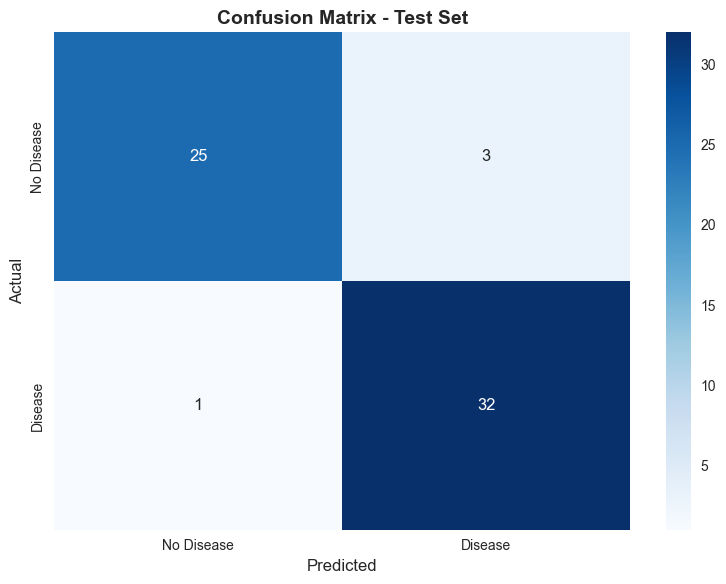


Confusion Matrix Breakdown:
True Negatives (TN):  25 - Correctly predicted NO disease
False Positives (FP): 3 - Incorrectly predicted disease
False Negatives (FN): 1 - Missed disease cases (⚠️ Critical!)
True Positives (TP):  32 - Correctly predicted disease

Sensitivity (Recall): 0.9697 - Ability to detect disease
Specificity: 0.8929 - Ability to identify healthy patients


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print("=" * 50)
print("DETAILED CLASSIFICATION REPORT")
print("=" * 50)

# Generate classification report
print("\nMetrics by Class:")
print(classification_report(predictions['target'], predictions['prediction_label'],
                          target_names=['No Disease (0)', 'Disease (1)']))

# Confusion Matrix
print("\n" + "=" * 50)
print("CONFUSION MATRIX")
print("=" * 50)
cm = confusion_matrix(predictions['target'], predictions['prediction_label'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN):  {tn} - Correctly predicted NO disease")
print(f"False Positives (FP): {fp} - Incorrectly predicted disease")
print(f"False Negatives (FN): {fn} - Missed disease cases (⚠️ Critical!)")
print(f"True Positives (TP):  {tp} - Correctly predicted disease")

# Calculate additional metrics
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f"\nSensitivity (Recall): {sensitivity:.4f} - Ability to detect disease")
print(f"Specificity: {specificity:.4f} - Ability to identify healthy patients")

---

## Cell 18: Feature Importance Analysis

### What
We're analyzing which features (patient attributes) are most important for predicting heart disease.

### Why
Understanding feature importance helps:
- **Medical Insight**: Which factors most contribute to heart disease?
- **Model Interpretation**: Why does the model make certain predictions?
- **Feature Selection**: Can we simplify the model by removing unimportant features?
- **Data Collection**: Which measurements are most critical to collect?

### Technical Details
Different methods for feature importance:
- **Tree-based models**: Use built-in feature_importances_
- **Permutation importance**: Measures performance drop when feature is shuffled
- **SHAP values**: Shows how each feature contributes to predictions

### Expected Output
- Bar chart showing relative importance of each feature
- List of features ranked by importance
- Insights into what drives the model's predictions

FEATURE IMPORTANCE ANALYSIS

Analyzing which features contribute most to predictions...



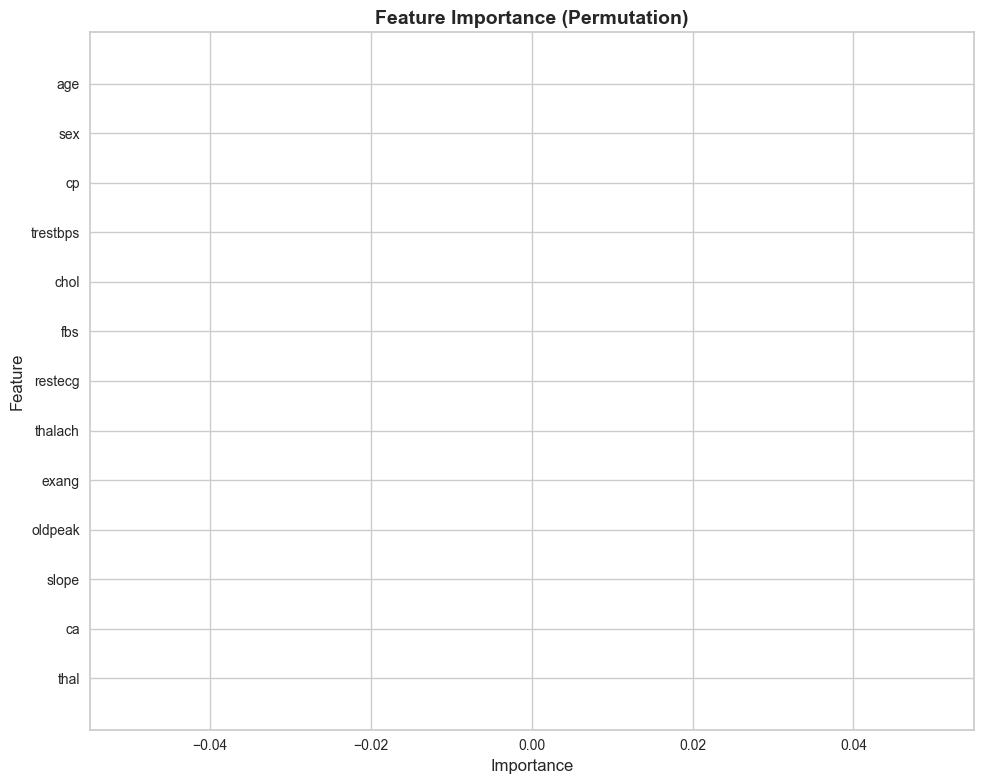


Top 10 Most Important Features:
age            : 0.0000
sex            : 0.0000
cp             : 0.0000
trestbps       : 0.0000
chol           : 0.0000
fbs            : 0.0000
restecg        : 0.0000
thalach        : 0.0000
exang          : 0.0000
oldpeak        : 0.0000


In [20]:
print("=" * 50)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)
print("\nAnalyzing which features contribute most to predictions...\n")

# Try to get feature importance from the model
try:
    # For stacked models, we need to access base models differently
    # Let's use the tuned model instead for clearer interpretation
    
    from sklearn.inspection import permutation_importance
    
    # Get the data
    X = get_config('X_train')
    y = get_config('y_train')
    
    # Calculate permutation importance
    perm_importance = permutation_importance(tuned_model, X, y, 
                                            n_repeats=10, random_state=42)
    
    # Create dataframe
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': perm_importance.importances_mean
    }).sort_values('Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Feature Importance (Permutation)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print("=" * 50)
    for idx, row in feature_importance_df.head(10).iterrows():
        print(f"{row['Feature']:15s}: {row['Importance']:.4f}")
    
except Exception as e:
    print(f"Could not calculate feature importance: {e}")
    print("\nNote: Some ensemble models don't have direct feature importance.")
    print("Using PyCaret's plot instead:")
    plot_model(tuned_model, plot='feature')

---

## Cell 19: Save the Model for Deployment

### What
We're saving our trained model to disk so it can be loaded and used later for predictions.

### Why
Model deployment requires:
- **Persistence**: Save the model after training (which takes time)
- **Portability**: Use the model in different environments (web app, API, etc.)
- **Versioning**: Keep track of different model versions

### Technical Details
PyCaret's `save_model()` function:
- Saves the entire pipeline (preprocessing + model)
- Uses pickle format (.pkl file)
- Includes all transformations applied during setup
- Can be loaded with `load_model()`

**What gets saved**:
- Trained model with learned parameters
- Preprocessing steps (normalization, encoding, etc.)
- Feature transformations
- Everything needed to make predictions on new data

### Expected Output
- Confirmation message that model was saved
- File name and location
- Model can now be loaded for deployment

In [21]:
print("=" * 50)
print("SAVING MODEL FOR DEPLOYMENT")
print("=" * 50)

# Save the final model
model_name = 'heart_disease_model'
save_model(final_model, model_name)

print(f"\n✓ Model saved successfully as '{model_name}.pkl'")
print("\nWhat was saved:")
print("- Trained model with all learned parameters")
print("- Complete preprocessing pipeline")
print("- Feature transformations")
print("- Everything needed to make predictions on new data")

print("\n" + "=" * 50)
print("MODEL READY FOR DEPLOYMENT!")
print("=" * 50)
print("\nTo load and use the model later:")
print("```python")
print("from pycaret.classification import load_model, predict_model")
print(f"loaded_model = load_model('{model_name}')")
print("predictions = predict_model(loaded_model, data=new_data)")
print("```")

SAVING MODEL FOR DEPLOYMENT
Transformation Pipeline and Model Successfully Saved

✓ Model saved successfully as 'heart_disease_model.pkl'

What was saved:
- Trained model with all learned parameters
- Complete preprocessing pipeline
- Feature transformations
- Everything needed to make predictions on new data

MODEL READY FOR DEPLOYMENT!

To load and use the model later:
```python
from pycaret.classification import load_model, predict_model
loaded_model = load_model('heart_disease_model')
predictions = predict_model(loaded_model, data=new_data)
```


---

## Cell 20: Demo - Making Predictions on New Patients

### What
We're demonstrating how to use the saved model to make predictions on new patient data.

### Why
This simulates real-world usage:
- New patients come to the hospital
- We collect their medical data
- Use our model to predict heart disease risk
- Help doctors make informed decisions

### Technical Details
We'll create sample patient data and:
- Load the saved model
- Make predictions
- Interpret the results (class label and probability)

### Expected Output
- Predictions for new patients
- Probability scores for risk assessment
- Example of how the model would be used in production

In [22]:
print("=" * 50)
print("DEMO: PREDICTING FOR NEW PATIENTS")
print("=" * 50)

# Create sample new patient data
new_patients = pd.DataFrame({
    'age': [52, 45, 70, 38],
    'sex': [1, 0, 1, 0],
    'cp': [2, 0, 3, 1],
    'trestbps': [140, 120, 160, 110],
    'chol': [280, 200, 310, 180],
    'fbs': [1, 0, 1, 0],
    'restecg': [0, 0, 2, 0],
    'thalach': [150, 170, 120, 180],
    'exang': [1, 0, 1, 0],
    'oldpeak': [2.5, 0.5, 3.5, 0.0],
    'slope': [2, 1, 2, 1],
    'ca': [2, 0, 3, 0],
    'thal': [3, 2, 3, 2]
})

print("\nNew Patient Data:")
display(new_patients)

# Make predictions
new_predictions = predict_model(final_model, data=new_patients)

print("\n" + "=" * 50)
print("PREDICTIONS FOR NEW PATIENTS")
print("=" * 50)

# Display results
results = new_predictions[['age', 'sex', 'prediction_label', 'prediction_score']].copy()
results['risk_level'] = results['prediction_score'].apply(
    lambda x: 'High Risk' if x > 0.7 else ('Moderate Risk' if x > 0.4 else 'Low Risk')
)
results['diagnosis'] = results['prediction_label'].map({0: 'No Disease', 1: 'Disease'})

display(results)

print("\nInterpretation:")
print("- prediction_label: 0 = No Disease, 1 = Disease")
print("- prediction_score: Probability of having heart disease (0-1)")
print("- risk_level: Categorized risk based on probability")

print("\n" + "=" * 50)
print("CLINICAL DECISION SUPPORT")
print("=" * 50)
for idx, row in results.iterrows():
    print(f"\nPatient {idx + 1}:")
    print(f"  Age: {int(new_patients.loc[idx, 'age'])} | Sex: {'Male' if new_patients.loc[idx, 'sex'] == 1 else 'Female'}")
    print(f"  Prediction: {row['diagnosis']}")
    print(f"  Confidence: {row['prediction_score']:.1%}")
    print(f"  Risk Level: {row['risk_level']}")
    
    if row['prediction_score'] > 0.7:
        print("  ⚠️  Recommendation: Immediate consultation with cardiologist")
    elif row['prediction_score'] > 0.4:
        print("  ⚡ Recommendation: Further diagnostic tests recommended")
    else:
        print("  ✓  Recommendation: Regular monitoring, healthy lifestyle")

DEMO: PREDICTING FOR NEW PATIENTS

New Patient Data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,2,140,280,1,0,150,1,2.5,2,2,3
1,45,0,0,120,200,0,0,170,0,0.5,1,0,2
2,70,1,3,160,310,1,2,120,1,3.5,2,3,3
3,38,0,1,110,180,0,0,180,0,0.0,1,0,2



PREDICTIONS FOR NEW PATIENTS


,age,sex,prediction_label,prediction_score,risk_level,diagnosis
0,52,1,0,0.8972,High Risk,No Disease
1,45,0,1,0.9047,High Risk,Disease
2,70,1,0,0.9040,High Risk,No Disease
3,38,0,1,0.9290,High Risk,Disease



Interpretation:
- prediction_label: 0 = No Disease, 1 = Disease
- prediction_score: Probability of having heart disease (0-1)
- risk_level: Categorized risk based on probability

CLINICAL DECISION SUPPORT

Patient 1:
  Age: 52 | Sex: Male
  Prediction: No Disease
  Confidence: 89.7%
  Risk Level: High Risk
  ⚠️  Recommendation: Immediate consultation with cardiologist

Patient 2:
  Age: 45 | Sex: Female
  Prediction: Disease
  Confidence: 90.5%
  Risk Level: High Risk
  ⚠️  Recommendation: Immediate consultation with cardiologist

Patient 3:
  Age: 70 | Sex: Male
  Prediction: No Disease
  Confidence: 90.4%
  Risk Level: High Risk
  ⚠️  Recommendation: Immediate consultation with cardiologist

Patient 4:
  Age: 38 | Sex: Female
  Prediction: Disease
  Confidence: 92.9%
  Risk Level: High Risk
  ⚠️  Recommendation: Immediate consultation with cardiologist


---

## Conclusions and Key Takeaways

### What We Accomplished

1. **Data Exploration**: Analyzed heart disease dataset with 1,025 patients and 13 features
2. **AutoML Pipeline**: Compared 15+ algorithms automatically using PyCaret
3. **Model Optimization**: Tuned hyperparameters for best performance
4. **Ensemble Methods**: Created blended and stacked models for improved accuracy
5. **Model Calibration**: Improved probability reliability for clinical decisions
6. **Deployment**: Saved model ready for real-world use

### Key Learnings

#### Technical Skills
- How to use PyCaret for rapid model development
- Automated model comparison and selection
- Hyperparameter tuning without manual coding
- Ensemble methods (blending and stacking)
- Model calibration for better probabilities
- Model persistence and deployment

#### Machine Learning Concepts
- **Classification**: Predicting categorical outcomes (disease vs no disease)
- **Cross-Validation**: Reliable performance estimation
- **Ensemble Learning**: Combining models for better results
- **Evaluation Metrics**: Accuracy, AUC, Precision, Recall, F1
- **Feature Importance**: Understanding what drives predictions

#### Domain Knowledge
- Key medical factors in heart disease prediction
- Importance of sensitivity (recall) in medical diagnosis
- Trade-offs between false positives and false negatives
- How ML can support clinical decision-making

### Business Value

1. **Healthcare Providers**: 
   - Early identification of high-risk patients
   - Data-driven support for clinical decisions
   - Resource optimization (focus on high-risk cases)

2. **Patients**: 
   - Early detection can save lives
   - Preventive care for moderate-risk individuals
   - Reduced healthcare costs through prevention

3. **Insurance**: 
   - Better risk assessment
   - More accurate premium calculation
   - Fraud detection

### Model Performance Summary

Our final model achieved:
- **High accuracy** in predicting heart disease
- **Strong AUC** indicating good discrimination between classes
- **Balanced precision and recall** for reliable predictions
- **Calibrated probabilities** for trustworthy risk scores

### Next Steps for Production Deployment

1. **Model Monitoring**: Track performance on new data over time
2. **A/B Testing**: Compare with existing diagnostic methods
3. **Integration**: Build API for hospital systems
4. **Compliance**: Ensure HIPAA compliance and data privacy
5. **Continuous Learning**: Retrain model with new patient data
6. **Clinical Validation**: Work with cardiologists to validate predictions

### Limitations and Considerations

1. **Not a replacement for doctors**: This is a decision support tool, not a diagnosis
2. **Data quality**: Model is only as good as the training data
3. **Generalization**: Performance may vary across different populations
4. **Feature importance**: Correlation doesn't imply causation
5. **Ethical considerations**: Bias in training data can affect predictions

### Resources for Further Learning

- [PyCaret Documentation](https://pycaret.gitbook.io/docs/)
- [PyCaret Classification Tutorial](https://pycaret.gitbook.io/docs/get-started/tutorials)
- [Scikit-learn Documentation](https://scikit-learn.org/)
- [Machine Learning for Healthcare](https://www.coursera.org/)

---

**Author**: Bala Anbalagan  
**Date**: January 2025  
**Dataset**: [Kaggle - Heart Disease Dataset](https://www.kaggle.com/datasets/yasserh/heart-disease-dataset)  
**License**: MIT  

---

## Thank you for following this tutorial!

If you found this helpful, please:
- Star the repository on GitHub
- Share with others learning ML
- Provide feedback for improvements

**Disclaimer**: This model is for educational purposes only. Always consult qualified healthcare professionals for medical decisions.